# Grundgerüst Leistungsausweis
Dieses Notebook soll euch als Grundgerüst für euren Leistungsnachweis dienen. Es soll euch eine Idee/ Hilfestellung bieten, wie man einen neuen Datensatz, basierend auf einer Fragestellung, strukturiert analysieren und interpretieren kann. Wie besagt, dient das Notebook als Hilfestellung, ist jedoch keinenfalls vollständig ausgeschöpft. In diesem Sinne dürft ihr auch gerne Sachen miteinbeziehen, welche hier nicht genannt werden. 

-> Bitte schreibt die Antwort zu den jeweiligen Punkten an oberster Stelle unterhalb der Titel (so wie dies auch im Leistungsnachweisbeispiel gemacht wurde).


## Struktur
1. Fragestellung(en) und Datenbeschaffung
2. Daten laden
3. Daten vorbereiten
4. Statistik der Rohdaten (Generell im Longformat)
5. Analyse der Daten

**Wichtig:** Alle graphischen Darstellungen sollten mindestens *Titel, Ticks- und Achsenbeschriftung* beinhalten (Siehe plots im Leistungsnachweisbeispiel)

---

## 1. Fragestellung(en) und Datenbeschaffung
### 1.1 Titel: 
- Veränderung der Müttersterblichkeitsrate
### 1.2 Fragestellung:
- Wir untersuchen, wie sich die Müttersterblichkeitsrate weltweit in verschiedenen Ländern von 2000 bis 2023 verändert hat und welche Ursachen  am stärksten zur Müttersterblicheit beitragen.   
### 1.3 Datenquelle(n):
- https://ourworldindata.org/maternal-mortality
### 1.4 Weitere Quellen:
- 




### 1.4 Daten beschaffen und laden

In [3]:
# lade deine Bibliotheken -> Pandas, Seaborn, Matplotlib sind die wichtigsten für diese Aufgaben

import pandas as pd
from matplotlib import pyplot as plt

In [4]:
# lade hier deine Daten
df = pd.read_csv('number-of-maternal-deaths-by-region.csv', skiprows=1,
                 names=['Land','Code','Jahr','Müttersterblichkeit', 'Annotation'])

df = df.drop(columns=['Annotation'])
 
df.head()

,Land,Code,Jahr,Müttersterblichkeit
0,Afghanistan,AFG,1985,13181.217
1,Afghanistan,AFG,1986,11068.511
2,Afghanistan,AFG,1987,10826.929
3,Afghanistan,AFG,1988,9364.836
4,Afghanistan,AFG,1989,9327.983


## 2. Daten vorbereiten 
- Die Daten sind im Long-Format
- Die Daten sind in einer Pivot-Tabelle dargestellt. Die Zeilen repräsentieren die Länder und die Spalten die verschiedenen Jahre. Die Jahre werden von links nach rechts immer aktueller.

In [5]:
df_pivot = df.pivot(index='Land', columns='Jahr', values='Müttersterblichkeit')
df_pivot.head()


Jahr,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Land,,,,,,,,,,,,,,,,,,,,,
Afghanistan,13181.217000,11068.511000,10826.929000,9364.836000,9327.983000,9874.669000,9818.087000,9643.358000,10228.346000,11888.982000,...,9810.437000,9870.905000,9438.184000,8971.437500,8698.753000,8450.418000,9060.640000,9597.547000,8055.301300,7646.329600
Africa,231344.170000,231458.950000,242016.560000,236258.700000,234999.660000,236437.110000,235685.840000,242697.750000,241246.190000,235799.610000,...,225785.050000,223385.530000,217618.720000,211686.770000,203149.980000,197870.620000,191660.080000,199323.830000,183741.110000,181866.660000
Albania,30.430904,28.572790,27.413498,26.916271,26.358099,25.229862,23.202032,21.155695,18.773117,17.337833,...,3.686695,3.293230,2.915944,2.598465,2.326609,2.206411,2.128189,4.134013,2.330551,1.977849
Algeria,2449.367400,2178.134000,1940.598100,1785.949700,1664.787000,1531.345600,1517.179200,1506.790400,1499.519800,1494.267300,...,822.211550,821.023440,817.778600,806.451200,771.523200,740.652160,955.951800,755.089970,600.643000,566.103000
Andorra,0.115992,0.111881,0.111295,0.108967,0.131117,0.106446,0.123265,0.128556,0.125128,0.126537,...,0.064251,0.065421,0.059839,0.064180,0.057989,0.056932,0.256290,0.095306,0.090644,0.058978


## 3. Statistik der Rohdaten (Analyse im Long-Format)
Übersicht über die einzelnen Spalten:
- In den Spalte 'Länder' sowie 'Codes' sind 196 Länder mit Datenpunkten vorhanden.
- Bei den Ländern/Codes wurden Einkommens-Stufen und Kontinente entfernt.
- Die Datenpunkte sind zwischen 1985 und 2023 gemessen worden. Der Datensatz ist fast von Beginn weg vollständig, nur in Kiribati wurden erst ab 1986 Daten aufgezeichnet. Folglich wurden 39 Jahre die Daten vollständig aufgezeichnet. 
- Die Müttersterblichkeit liegt zwischen 0 und 179'946.48 Tode.

In [6]:
df.dtypes

Land                    object
Code                    object
Jahr                     int64
Müttersterblichkeit    float64
dtype: object

#### 3.1 Analyse der Länder 


In [22]:
unerwünscht = [
    'Africa', 'Asia', 'Europe', 'World', 'North America', 'Oceania',
    'High-income countries', 
    'Low-income countries',
    'Lower-middle-income countries',
    'Upper-middle-income countries'
]

df = df[~df['Land'].isin(unerwünscht)]


In [23]:
print('Anzahl der verschienenen Länder: ', len(df['Land'].unique()))

Anzahl der verschienenen Länder:  196


In [9]:
df['Land'].value_counts().sort_values(ascending=True)

Land
Kiribati       38
Afghanistan    39
Algeria        39
Albania        39
Angola         39
               ..
Vanuatu        39
Zambia         39
Venezuela      39
Yemen          39
Zimbabwe       39
Name: count, Length: 198, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Land'}, xlabel='Land', ylabel='Anzahl Datenpunkte'>

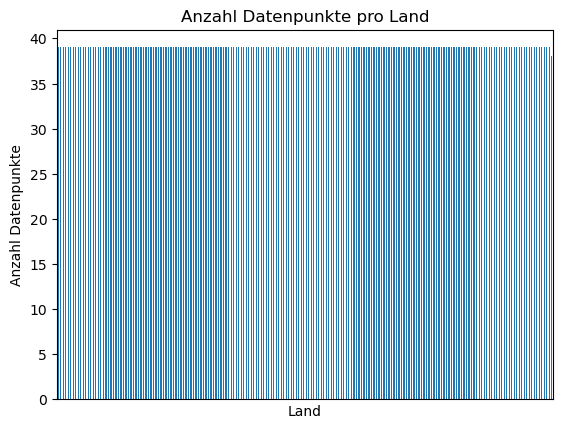

In [10]:
# Oben schon sortiert, deshalb sieht man, dass genau 1 nicht 39 ist
df['Land'].value_counts().plot(kind='bar',
                               xticks=[],
                               ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Land')

#### 3.2 Analyse Codes

In [11]:
print('Anzahl verschiedener Codes: ', len(df['Code'].unique()))

Anzahl verschiedener Codes:  196


In [12]:
df['Code'].value_counts().sort_values(ascending=True)

Code
KIR    38
AFG    39
DZA    39
ALB    39
AGO    39
       ..
VEN    39
SVN    39
ZMB    39
YEM    39
ZWE    39
Name: count, Length: 195, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Code'}, xlabel='Code', ylabel='Anzahl Datenpunkte'>

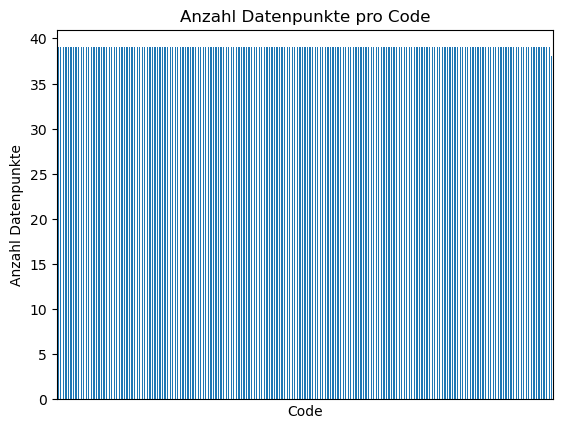

In [13]:
# Oben schon sortiert, deshalb sieht man, dass genau 1 nicht 39 ist
df['Code'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code')

#### 3.3 Analyse der Jahre

In [14]:
print('Anzahl verschiedener Jahre: ', len(df['Jahr'].unique()))

Anzahl verschiedener Jahre:  39


In [15]:
df['Jahr'].value_counts().sort_index()

Jahr
1985    197
1986    198
1987    198
1988    198
1989    198
1990    198
1991    198
1992    198
1993    198
1994    198
1995    198
1996    198
1997    198
1998    198
1999    198
2000    198
2001    198
2002    198
2003    198
2004    198
2005    198
2006    198
2007    198
2008    198
2009    198
2010    198
2011    198
2012    198
2013    198
2014    198
2015    198
2016    198
2017    198
2018    198
2019    198
2020    198
2021    198
2022    198
2023    198
Name: count, dtype: int64

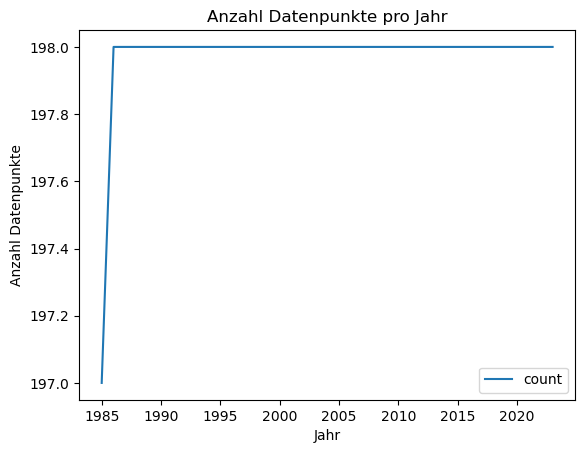

In [16]:
g = df['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr')
g.legend()

#### 3.4 Analyse der Müttersterblichkeit

In [17]:
df.describe()

,Jahr,Müttersterblichkeit
count,7721.000000,7721.000000
mean,2004.002461,2162.434828
std,11.254009,9145.613178
min,1985.000000,0.000191
25%,1994.000000,6.733131
50%,2004.000000,82.628170
75%,2014.000000,1056.831000
max,2023.000000,179946.480000


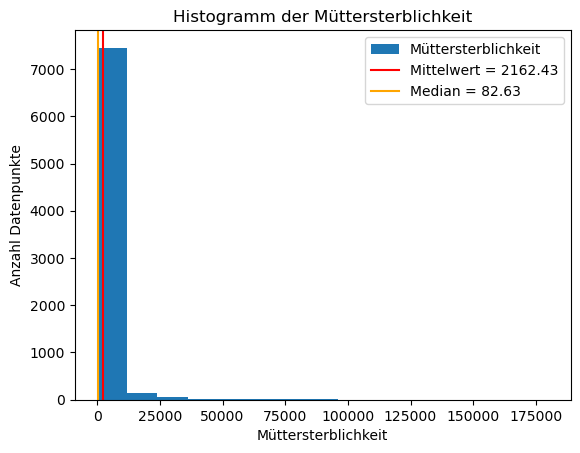

In [19]:
g = df['Müttersterblichkeit'].plot(
    kind='hist',
    bins=15,
    title='Histogramm der Müttersterblichkeit',
    xlabel='Müttersterblichkeit',
    ylabel='Anzahl Datenpunkte'
)
 
mean = df['Müttersterblichkeit'].mean()
median = df['Müttersterblichkeit'].median()
 
g.axvline(x=mean, color='red', label=f'Mittelwert = {mean:.2f}')
g.axvline(x=median, color='orange', label=f'Median = {median:.2f}')
 
g.legend()

## 4. Analyse 

### Vorgehen
- Spezifische Untersuchung der Fragestellung (Berechnungen)
- Visualisieren der Resultate: Verwendet Achsenbeschriftung und überlegt euch, welche Art von Darstellung sinnvoll ist (Kuchen-, Säulen, Liniendiagramm; 2 y-Achsen?)
- Beschreiben der Beobachtungen
- Interpretation der Resultate (Hypothesen zu den Resultaten)
- Untermauern der Interpretation mittels Hinweise zur Literatur (Mögliche Zusammenhänge aufzeigen).

### Beobachtungen:
- Die Länder mit der grössten Abnahme der Müttersterblichkeit sind:
Indien, Bangladesh, China, Ethiopien, Indonesien
- Diese, meist asiatischen, Länder haben eine Abnahme von mehr als 16'000 Toden.

- Die Länder mit der grössten Zunahme der Müttersterblichkeit sind:
Nigeria, Congo, Chad, Kenya, Cote d'Ivoire, Cameroon
- Diese afrikanischen Länder haben eine Zunahme von mehr als 1'000 Toden.

### Interpretation:

Beim Histogramm Ausreiser anschauen (Welches Land, wiso so hoch?, was ist zweit höchster Wert? Möglicherweise Fehler bei Daten übertragung?)

In [24]:
df.sort_values(by= "Müttersterblichkeit", ascending= False).head(30)

,Land,Code,Jahr,Müttersterblichkeit
3198,India,IND,1985,179946.480
3199,India,IND,1986,173636.560
3200,India,IND,1987,164799.060
3201,India,IND,1988,157724.440
3202,India,IND,1989,151595.160
3203,India,IND,1990,145252.600
3204,India,IND,1991,140901.080
3205,India,IND,1992,136597.670
3206,India,IND,1993,132561.810
3207,India,IND,1994,128659.210
